In [ ]:
Convert daily price changes % to absolute changes in ticks (1bps=4 ticks). 1bps is 0,01%
Check for events flag in yahoo finance, we want to scope the data for non-events
Labelling distributions based on time-frames 1week, 1month, 1 yr (for later)

# Importing Libraries

In [39]:
import yfinance as yf
import datetime
from datetime import date
import pandas as pd
import os
import matplotlib.pyplot as plt

# Get Market Data for a particular  Price Parameter(Open/Close) and ticker(ZN=F,CL=F)->converted to Symbol for display

In [61]:
def get_market_data(symbol_list=[],start_date="",end_date="",interval='1d',returns_change=False,get_specific_price_parameters=['Adj Close']):#start_date and end_date so no period required
    if get_specific_price_parameters==None:
         df=yf.download(tickers=symbol_list, start=start_date, end=end_date, interval=interval)#Displays all like Open,High,Low....
    else:  
        df=yf.download(tickers=symbol_list, start=start_date, end=end_date, interval=interval)[get_specific_price_parameters] #displays only selected


    # replace =F by "", "DX-Y.NYB" by "DXY" and "^" by "":
    if len(symbol_list)>1: #if more than one symbol in symbol_list, then individual symbols would be displayed else no
        nsymbols=len(df.columns)
        replaced_columns=[]
        for i in range(nsymbols):
            symbol=df.columns[i][1]
            price=df.columns[i][0]
            replaced_symbol=symbol.replace('=F',"")
            replaced_symbol=replaced_symbol.replace('DX-Y.NYB',"DXY")
            replaced_symbol=replaced_symbol.replace('^',"")
            
            replaced_columns.append((price,replaced_symbol))
        df.columns=pd.MultiIndex.from_tuples(replaced_columns)

    if returns_change==True: # show relative absolute increase/decrease in the form of ticks(1bps=4ticks).
        df_abs_ticks=(4*100*100*df.pct_change()).abs() #f fractional change=100f% change, 1% change == 100bps, 1bps==4ticks
        df_abs_ticks_no_null=df_abs_ticks.dropna()
        return df_abs_ticks_no_null
    else:  #Display actual values without any relative calculation.
        df=df.dropna()
        return df

get_market_data(symbol_list=['ZN=F','CL=F'],start_date="2024-10-14",end_date="2024-10-15",interval='1m',returns_change=False,
                get_specific_price_parameters=None)#'Adj Close','Open','Close'])




[*********************100%***********************]  2 of 2 completed


Adj Close                  Close              \
                                  CL          ZN         CL          ZN   
Datetime                                                                  
2024-10-14 04:00:00+00:00  74.699997  112.031250  74.699997  112.031250   
2024-10-14 04:02:00+00:00  74.680000  112.046875  74.680000  112.046875   
2024-10-14 04:06:00+00:00  74.669998  112.031250  74.669998  112.031250   
2024-10-14 04:07:00+00:00  74.660004  112.031250  74.660004  112.031250   
2024-10-14 04:08:00+00:00  74.650002  112.031250  74.650002  112.031250   
...                              ...         ...        ...         ...   
2024-10-14 20:33:00+00:00  74.010002  112.000000  74.010002  112.000000   
2024-10-14 20:34:00+00:00  73.989998  112.000000  73.989998  112.000000   
2024-10-14 20:35:00+00:00  73.989998  112.000000  73.989998  112.000000   
2024-10-14 20:36:00+00:00  74.010002  112.000000  74.010002  112.000000   
2024-10-14 20:37:00+00:00  74.000000  112.000000  74.000000  112.000000   

                                High                    Low              \
                                  CL          ZN         CL          ZN   
Datetime                                                                  
2024-10-14 04:00:00+00:00  74.699997  112.046875  74.680000  112.031250   
2024-10-14 04:02:00+00:00  74.690002  112.046875  74.680000  112.046875   
2024-10-14 04:06:00+00:00  74.680000  112.031250  74.660004  112.031250   
2024-10-14 04:07:00+00:00  74.680000  112.031250  74.660004  112.015625   
2024-10-14 04:08:00+00:00  74.660004  112.031250  74.650002  112.031250   
...                              ...         ...        ...         ...   
2024-10-14 20:33:00+00:00  74.019997  112.000000  74.010002  111.984375   
2024-10-14 20:34:00+00:00  74.000000  112.000000  73.989998  111.984375   
2024-10-14 20:35:00+00:00  74.000000  112.000000  73.989998  111.984375   
2024-10-14 20:36:00+00:00  74.010002  112.000000  74.000000  111.984375   
2024-10-14 20:37:00+00:00  74.010002  112.000000  73.959999  111.984375   

                                Open             Volume         
                                  CL          ZN     CL     ZN  
Datetime                                                        
2024-10-14 04:00:00+00:00  74.680000  112.046875    0.0    0.0  
2024-10-14 04:02:00+00:00  74.690002  112.046875   10.0    1.0  
2024-10-14 04:06:00+00:00  74.660004  112.031250   25.0  696.0  
2024-10-14 04:07:00+00:00  74.680000  112.015625    6.0  363.0  
2024-10-14 04:08:00+00:00  74.650002  112.031250    6.0   50.0  
...                              ...         ...    ...    ...  
2024-10-14 20:33:00+00:00  74.019997  112.000000    3.0   17.0  
2024-10-14 20:34:00+00:00  74.000000  111.984375   12.0    8.0  
2024-10-14 20:35:00+00:00  73.989998  111.984375    7.0   10.0  
2024-10-14 20:36:00+00:00  74.000000  112.000000   17.0   13.0  
2024-10-14 20:37:00+00:00  74.010002  111.984375    0.0    0.0  

[911 rows x 12 columns]

# Get Intra-day data for a period and an interval and display only CLOSE details

In [62]:
def get_intraday_data(symbol, interval="5m", period="1d", start_date=None): #No end-date since same day.

    if start_date: #Is not None
        end_date = start_date - datetime.timedelta(days=int(period.replace("d", "")))
        df = get_market_data([symbol], start=end_date, end=start_date, interval=interval,get_specific_price_parameters=['Close'])
        #Display only "Close" details of the symbol.
    
    elif start_date==None: #If we dont have a start date
        df = yf.Ticker(symbol).history(period=period, interval=interval)
        dfclose=df['Close'].to_frame()

        repl_dic={"=F": "","DX-Y.NYB": "DXY", "^":""}
        for key in repl_dic:
            symbol=symbol.replace(key,repl_dic[key])
    
        dfclose.rename(columns={'Close': symbol}, inplace=True) 
        # return df_only_close
        return dfclose

get_intraday_data("CL=F")
    
    

,CL
Datetime,
2024-10-14 00:00:00-04:00,74.650002
2024-10-14 00:05:00-04:00,74.639999
2024-10-14 00:10:00-04:00,74.650002
2024-10-14 00:15:00-04:00,74.660004
2024-10-14 00:20:00-04:00,74.660004
...,...
2024-10-14 16:15:00-04:00,74.019997
2024-10-14 16:20:00-04:00,74.019997
2024-10-14 16:25:00-04:00,74.019997


In [63]:
def split_periods(data):
    periods = {
        "us_open": data.between_time("07:00:00", "11:00:00").sort_index(),
        "us_mid": data.between_time("11:00:01", "15:00:00").sort_index(),
        "us_close": data.between_time("15:00:01", "17:00:00").sort_index(),
        "us_apac": data.between_time("17:00:01", "02:00:00").sort_index(),
        "us_emea": data.between_time("02:00:01", "07:00:00").sort_index(),
    }
    return periods


def get_company_name(ticker):
    try:
        company = yf.Ticker(ticker)
        return company.info["longName"]
    except:
        try:
            company = yf.Ticker(ticker)
            return company.info["shortName"]
        except:
            return ticker  # Return the original ticker if unable to fetch the name

# Original Code

In [ ]:
#!conda install conda-forge::yfinance
#conda install seaborn

In [64]:
start_date = "2021-01-01" #start date
end_date = date.today().strftime("%Y-%m-%d") #converts today todat to yyyy-mm-dd
symbols = ["ZN=F", "DX-Y.NYB", "CL=F", "GC=F"]
dict_tickers = {
    "ZN=F": "10-Year T-Note Futures",
    "DX-Y.NYB": "US Dollar Index",
    "CL=F": "Crude Oil futures",
    "GC=F": "Gold futures",
    "NQ=F": "Nasdaq 100 futures",
    "^DJI": "Dow Jones Industrial Average",
    "^GSPC": "S&P 500",
}
dict_symbols = {
    "ZN": "10-Year T-Note Futures",
    "DXY": "US Dollar Index",
    "CL": "Crude Oil futures",
    "GC": "Gold futures",
    "NQ": "Nasdaq 100 futures",
    "DJI": "Dow Jones Industrial Average",
    "GSPC": "S&P 500",
}

# Fetch Data
close = get_market_data(symbols, start_date, end_date,returns_change=False)
close

[*********************100%***********************]  4 of 4 completed


Adj Close                                     
                                  CL         DXY           GC          ZN
Date                                                                     
2021-01-04 00:00:00+00:00  47.619999   89.879997  1944.699951  138.125000
2021-01-05 00:00:00+00:00  49.930000   89.440002  1952.699951  137.843750
2021-01-06 00:00:00+00:00  50.630001   89.529999  1906.900024  137.203125
2021-01-07 00:00:00+00:00  50.830002   89.830002  1912.300049  136.953125
2021-01-08 00:00:00+00:00  52.240002   90.099998  1834.099976  136.656250
...                              ...         ...          ...         ...
2024-10-08 00:00:00+00:00  73.570000  102.550003  2615.000000  112.468750
2024-10-09 00:00:00+00:00  73.239998  102.930000  2606.000000  112.203125
2024-10-10 00:00:00+00:00  75.849998  102.989998  2620.600098  112.078125
2024-10-11 00:00:00+00:00  75.559998  102.889999  2657.600098  112.250000
2024-10-14 00:00:00+00:00  73.989998  103.204002  2669.300049  112.000000

[951 rows x 4 columns]

In [65]:
###Step3: Creating returns of daily close prices

# Create output directory if it doesn't exist
output_dir = "output_daily_close_returns"
os.makedirs(output_dir, exist_ok=True)

# Get returns
returns=get_market_data(symbols, start_date, end_date,returns_change=True) #Value of ticks
returns

[*********************100%***********************]  4 of 4 completed
/var/folders/qc/knz8bs196t30_fkh2jr17kh80000gn/T/ipykernel_7716/248878495.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_abs_ticks=(4*100*100*df.pct_change()).abs() #f fractional change=100f% change, 1% change == 100bps, 1bps==4ticks


Adj Close                                     
                                    CL         DXY           GC          ZN
Date                                                                       
2021-01-05 00:00:00+00:00  1940.362390  195.814342   164.549806   81.447964
2021-01-06 00:00:00+00:00   560.785707   40.248808   938.186673  185.898889
2021-01-07 00:00:00+00:00   158.009685  134.034650   113.273362   72.884637
2021-01-08 00:00:00+00:00  1109.580796  120.225598  1635.728102   86.708500
2021-01-11 00:00:00+00:00     7.655682  195.339600   338.040460   68.602790
...                                ...         ...          ...         ...
2024-10-08 00:00:00+00:00  1851.179530    3.901750   450.696435    5.556327
2024-10-09 00:00:00+00:00   179.421956  148.219305   137.667304   94.470686
2024-10-10 00:00:00+00:00  1425.450948   23.315868   224.099734   44.562039
2024-10-11 00:00:00+00:00   152.933907   38.838130   564.756142   61.341140
2024-10-14 00:00:00+00:00   831.127446  122.073279   176.097994   89.086860

[951 rows x 4 columns]

In [66]:
# Save distribution of daily returns
name = f"{start_date}_to_{end_date}"
output_file = os.path.join(output_dir, "Daily_close_returns_" + f"{name}.csv")
returns.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).to_csv(output_file)

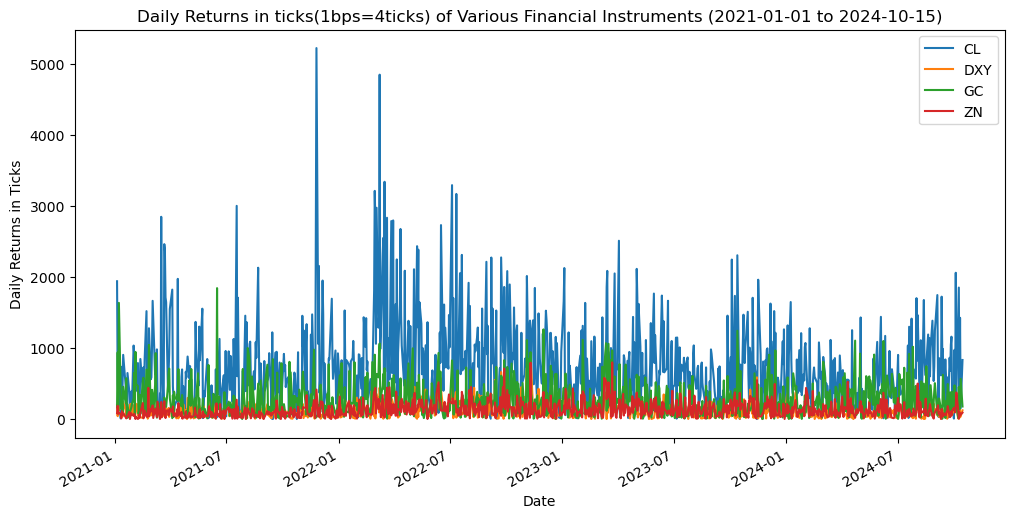

Returns distribution saved to output_daily_close_returns/Daily_close_returns_2021-01-01_to_2024-10-15.jpg


In [67]:
# Plot the returns
ax = returns.plot(figsize=(12, 6))

# Update legend with full names
handles,_ = ax.get_legend_handles_labels()

ax.legend(handles,[returns.columns[i][1] for i in range(len(returns.columns))])
plt.title(
    f"Daily Returns in ticks(1bps=4ticks) of Various Financial Instruments ({start_date} to {end_date})"
)
plt.xlabel("Date")
plt.ylabel("Daily Returns in Ticks")
output_file = os.path.join(output_dir, "Daily_close_returns_" + f"{name}.jpg")
plt.savefig(output_file)
plt.show()
print(f"Returns distribution saved to {output_file}")

Today's date: 2024-10-15
Date one week ago: 2024-10-08


[*********************100%***********************]  1 of 1 completed



Last one week - Intraday data Summary:
              Open         High          Low        Close    Adj Close  \
count  6028.000000  6028.000000  6028.000000  6028.000000  6028.000000   
mean    112.243152   112.251091   112.236132   112.243450   112.243450   
std       0.233000     0.232342     0.233554     0.232922     0.232922   
min     111.734375   111.734375   111.687500   111.718750   111.718750   
25%     112.078125   112.078125   112.078125   112.078125   112.078125   
50%     112.203125   112.218750   112.195312   112.203125   112.203125   
75%     112.468750   112.484375   112.453125   112.468750   112.468750   
max     112.734375   112.734375   112.718750   112.734375   112.734375   

             Volume  
count   6028.000000  
mean    1285.735733  
std     2818.207092  
min        0.000000  
25%       34.000000  
50%      310.000000  
75%     1512.000000  
max    68505.000000  


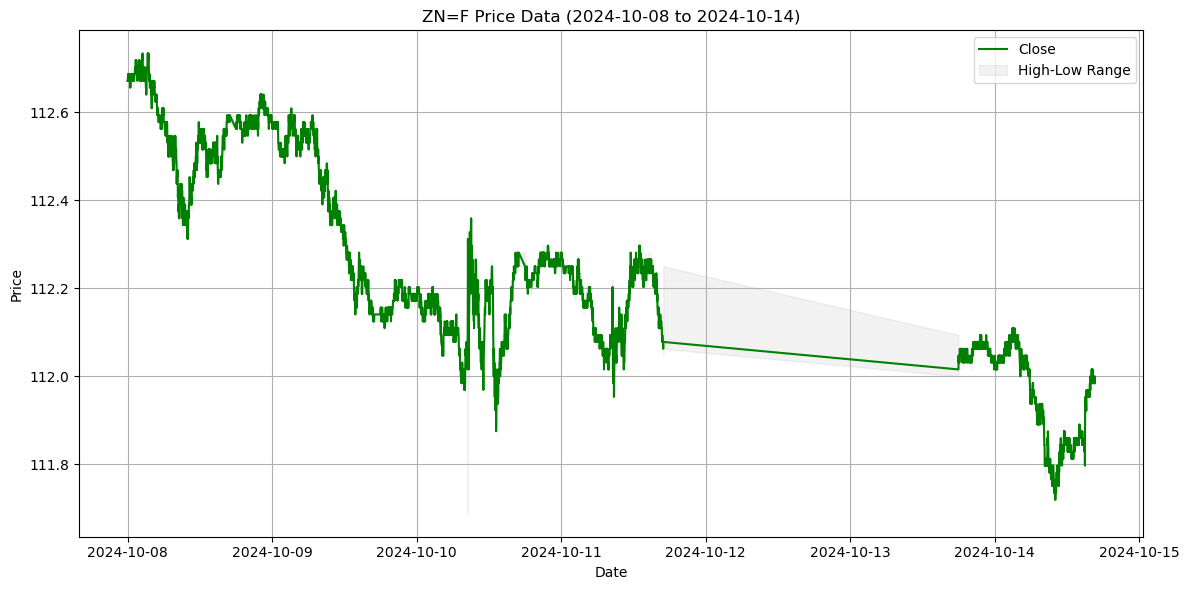


Actual date range of data:
Start: 2024-10-08 00:00:00-04:00
End: 2024-10-14 16:39:00-04:00
Total periods: 6028


In [71]:
###Step4: Intraday returns (High - Low)

# Get today's date
today = datetime.datetime.now()
start_intraday = today.strftime("%Y-%m-%d")

# Calculate the date one week ago
one_week_ago = today - datetime.timedelta(days=7)
end_intraday = one_week_ago.strftime("%Y-%m-%d")

# Print the results
print("Today's date:", start_intraday)
print("Date one week ago:", end_intraday)

# Save distribution of daily returns
# Create output directory if it doesn't exist
output_dir = "output_weekly_intraday"
os.makedirs(output_dir, exist_ok=True)
name = f"{end_intraday}_to_{start_intraday}"

# Fetch Data
symbol = "ZN=F" #US Market 10 yrs Treasury futures.
try:
    data = get_market_data([symbol], start_date=end_intraday, end_date=start_intraday, interval="1m",get_specific_price_parameters=None,
                          returns_change=False) #1m is the minimum interval.
    #get_specific_price_parameters=None 
    if data.empty:
        raise ValueError("No data available for the specified date range.")

    # Print some statistics
    print("\nLast one week - Intraday data Summary:")
    print(data.describe())
    output_file = os.path.join(
        output_dir, "Intraday_weekly_summary_" + symbol + f"{name}.csv"
    )
    data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).to_csv(output_file)

    # Plot the data
    plt.figure(figsize=(12, 6))

    # Plot Adj Close as a line
    plt.plot(data.index, data["Close"], label="Close", color="green")

    # Shade the area between High and Low
    plt.fill_between(
        data.index,
        data["Low"],
        data["High"],
        alpha=0.1,
        color="gray",
        label="High-Low Range",
    )

    plt.title(
        f"{symbol} Price Data ({data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')})"
    )
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    output_file = os.path.join(
        output_dir, "Weekly_intraday_returns_" + symbol + f"{name}.jpg"
    )
    plt.savefig(output_file)
    plt.show()

    # Print the actual date range of the data
    print(f"\nActual date range of data:")
    print(f"Start: {data.index[0]}")
    print(f"End: {data.index[-1]}")
    print(f"Total periods: {len(data)}")

except Exception as e:
    print(f"An error occurred: {e}")
    print(
        "Try adjusting the date range or check the availability of data for this symbol."
    )